In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats


In [3]:
data = pd.read_csv("ignorefolder/cleaned_US_Accidents.csv", index_col=0)
print(data.columns)
features = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
            'Pressure(in)', 'Wind_Speed(mph)']

#Ensuring we don't take any severity 0s
severity_mask = data['Severity'] != 0
n = severity_mask.sum()
data = data[severity_mask]


Index(['Severity', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Weather_Condition_Score'],
      dtype='object')


### Basic Severity Analysis

0.9999999999999999


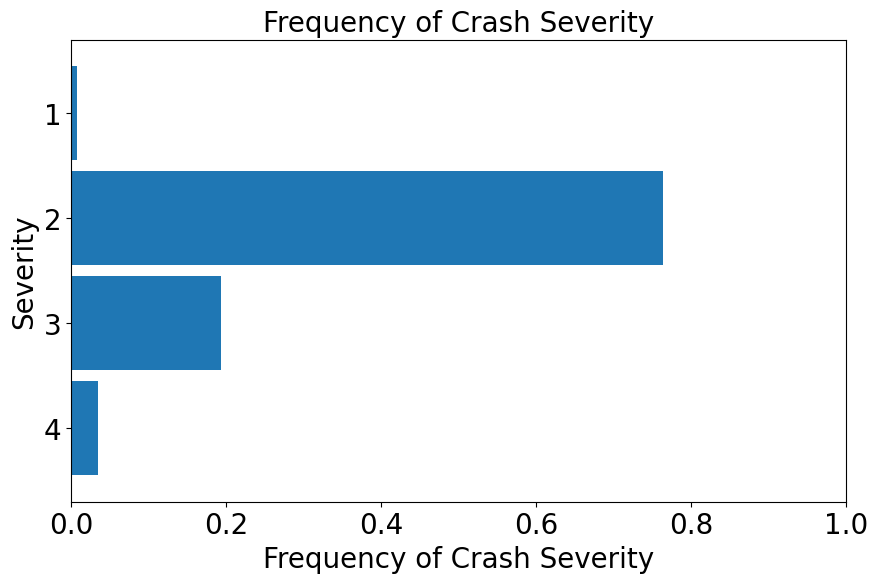

In [4]:
counts = data['Severity'].value_counts().sort_index(ascending=False) / n
print(counts.sum())

counts.plot(kind='barh', stacked=True, figsize=(10,6), width=0.9)
plt.ylabel("Counts", fontsize=20)
plt.xlim((0, 1))
plt.xlabel("Frequency of Crash Severity", fontsize=20)
plt.ylabel("Severity")
plt.title("Frequency of Crash Severity", fontsize=20)
plt.tick_params(axis='both', labelsize=20)

### Weather Analysis

In [5]:
def remove_outliers(data, feature):
    Q1, Q3 = np.quantile(data[feature], 0.25), np.quantile(data[feature], 0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    mask = np.logical_and(data[feature] >= lower, data[feature] <= upper)
    data = data[mask]
    return data

def plot_box_plot(data, feature, title, ax):
    plt.sca(ax)
    data.plot.box(column=feature, by='Severity', 
                flierprops={'markerfacecolor': 'k', 'markersize': 5},
                ax = ax, 
                color = dict(boxes='k', whiskers='k', medians='r', caps='k'),
                boxprops=dict(linewidth=5),          # Linewidth for the box
                whiskerprops=dict(linewidth=5),      # Linewidth for the whiskers
                medianprops=dict(linewidth=5), # Linewidth and color for the median
                capprops=dict(linewidth=5))
    
    plt.xlabel('Severity', fontsize=40)
    plt.ylabel(feature, fontsize=40)
    plt.title("", fontsize=40)
    ax.tick_params(axis='both', labelsize=40)

def run_ANOVA(data, feature):
    grouped_data = data.groupby("Severity")
    groups = [group[feature] for _, group in grouped_data]
    f_stat, p_value = stats.f_oneway(*groups)
    return p_value
    

ANOVA p value: 0.0
ANOVA p value: 0.0
ANOVA p value: 1.3232501955720875e-100
ANOVA p value: 0.0
ANOVA p value: 3.2933347873748095e-172


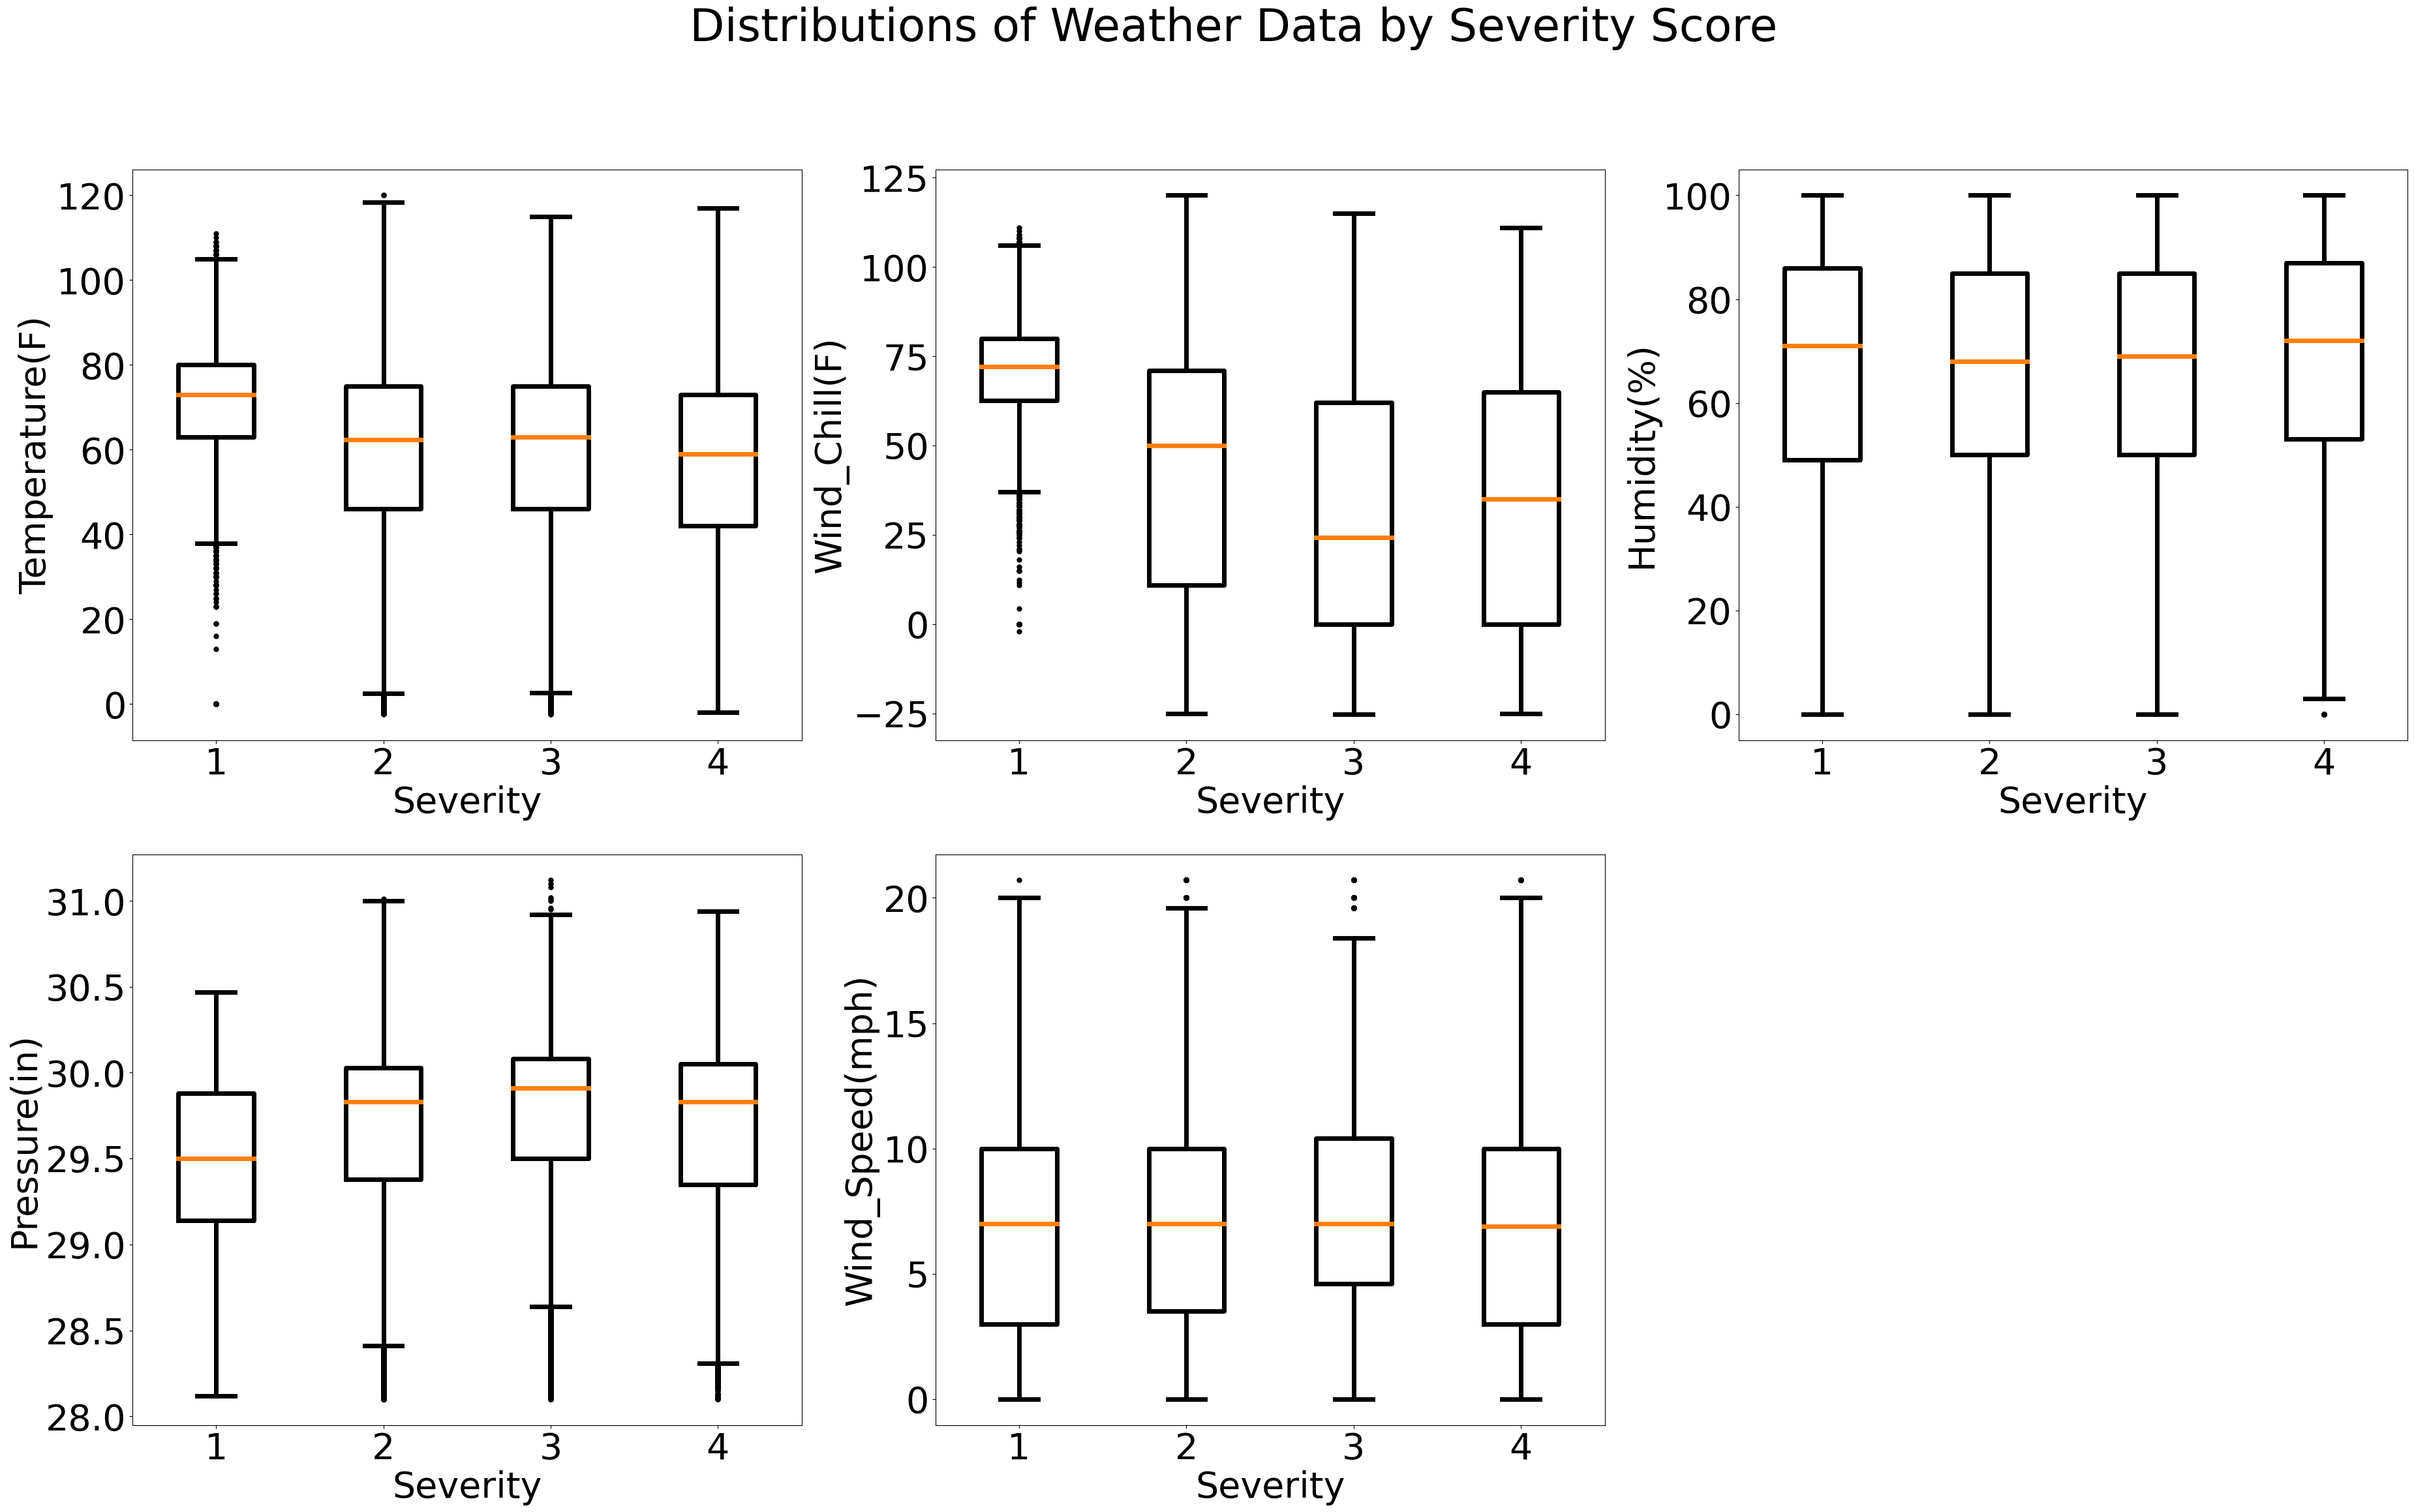

In [6]:
for feature in features:
    data = remove_outliers(data, feature)
    print(f"ANOVA p value: {run_ANOVA(data, feature)}")

figure, axes = plt.subplots(2, 3, figsize=(45, 25))
figure.suptitle("Distributions of Weather Data by Severity Score", fontsize=50)
axes = axes.ravel()
axes[-1].remove()

for i, feature in enumerate(features):
    ax = axes[i]
    plot_box_plot(data, feature, title=feature, ax=ax)


### Weather Analysis

Severity                  1         2         3         4
Weather_Condition                                        
0                  0.007992  0.763221  0.195252  0.033535
1                  0.006577  0.724937  0.235423  0.033063
2                  0.007252  0.696100  0.266268  0.030380


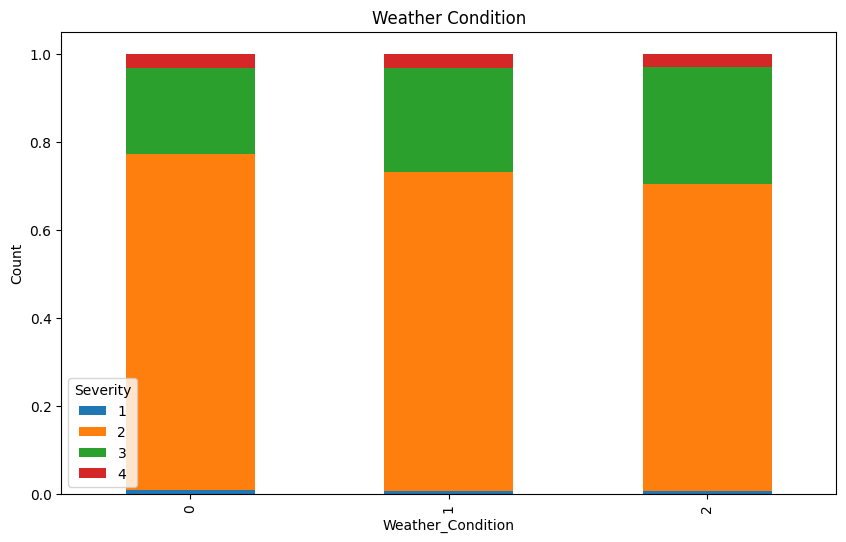

In [7]:
features = ['Weather_Condition', 'Amenity', 'Bump', 'Crossing',
            'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
            'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

counts = data.groupby('Weather_Condition')['Severity'].value_counts().unstack(fill_value=0)
row_props = counts.div(counts.sum(axis=1), axis=0)
print(row_props)

row_props.plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel("Count")
plt.title("Weather Condition")
plt.show()

In [ ]:
features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
            'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
            'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

summary_df = (
    data
    .groupby("Severity")[features]
    .sum()
    .T
)

summary_df = summary_df[[1, 2, 3, 4]]
summary_df = summary_df
summary_df




Severity,1,2,3,4
Amenity,0.032450,0.036373,0.015707,0.029786
Bump,0.000510,0.000900,0.000712,0.000103
Crossing,0.318552,0.278923,0.168581,0.189265
Give_Way,0.010194,0.012522,0.016609,0.016237
Junction,0.045022,0.144578,0.402268,0.319371
No_Exit,0.006286,0.005792,0.006193,0.005585
Railway,0.021916,0.018035,0.023514,0.024822
Roundabout,0.000000,0.000130,0.000047,0.000000
Station,0.060143,0.063508,0.036397,0.042921
Stop,0.051138,0.063326,0.024510,0.076844


{'Amenity': 0.013299201178105523, 'Bump': 0.0003347810168037819, 'Crossing': 0.10406733649841307, 'Give_Way': 0.005108697631045022, 'Junction': 0.0688141874328668, 'No_Exit': 0.0022898616980174084, 'Railway': 0.007397547906050939, 'Roundabout': 4.5514035517130474e-05, 'Station': 0.02353480205440242, 'Stop': 0.023245535073115768, 'Traffic_Calming': 0.000898143634204708, 'Traffic_Signal': 0.1432296355033751, 'Turning_Loop': 0.0}
0.3922652436619177


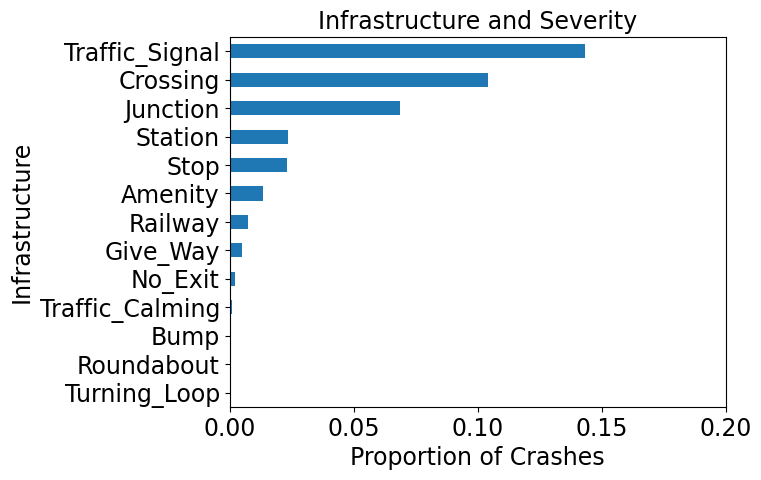

In [9]:
features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
            'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
            'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

df = data[features]
summary = {}

for feature in features:
    mask = df[feature] == 1
    feature_amount = data[mask].shape[0]
    props = feature_amount / n
    summary[feature] = props

print(summary)

summary_df = pd.Series(summary).fillna(0).sort_values(ascending=True)  # features as rows
print(summary_df.sum())

summary_df.plot.barh()
plt.xlim((0, .2))
plt.xlabel("Proportion of Crashes", fontsize=17)
plt.ylabel("Infrastructure", fontsize=17)
plt.title("Infrastructure and Severity", fontsize=17)
plt.tick_params(axis='both', labelsize=17)